In [3]:
import sys
import os
import xarray as xr
import matplotlib.pyplot as plt
sys.path.append(os.path.join(os.environ['HOME'], 'Isca'))    # So can access functions in isca_tools which is in home/Isca directory
import isca_tools
import numpy as np
from isca_tools.utils import area_weighting

In [4]:
# Plot evolution of net flux and temperature to see how long it takes to spin up
def plot_spinup(d, ax, albedo, tau):
    olr_sum = area_weighting(d.olr).sum(dim = ['lon','lat'])
    short_wave_sum = area_weighting(d.swdn_toa).sum(dim = ['lon','lat'])
    # Include surface albedo which reflects all SW radiation reaching it
    # SW radiation reaching it has been reduced by that absorbed in the atmosphere - non zero short wave optical depth.
    # There is no absorption on return trip from surface to space though hence just the one factor.
    net_flux = olr_sum - short_wave_sum*(1-albedo*np.exp(-tau))
    net_flux.plot.line(ax=ax, color='b')
    ax.set_ylabel('TOA Net Outgoing FLux / $Wm^{-2}$\nOLR - (1-$\\alpha e^{-\\tau})SW$', color='b')
    t_surf_mean = d.t_surf.mean(dim = ['lon','lat']) - 273.15  # In Celsius
    ax2 = ax.twinx()
    t_surf_mean.plot.line(ax=ax2, color='r')
    ax2.set_ylabel('Surface Temperature / $°C$', color='r')


In [5]:
# Load dataset across all months for each depth value
depth_value = 5    # mixed layer depths in meters
exp_name = f'aquaplanet/vary_co2/d{depth_value}'
dataset = isca_tools.load_dataset(exp_name)
namelist = isca_tools.load_namelist(exp_name)  # Need this for albedo_value
albedo = namelist['mixed_layer_nml']['albedo_value']
tau = namelist['two_stream_gray_rad_nml']['atm_abs']


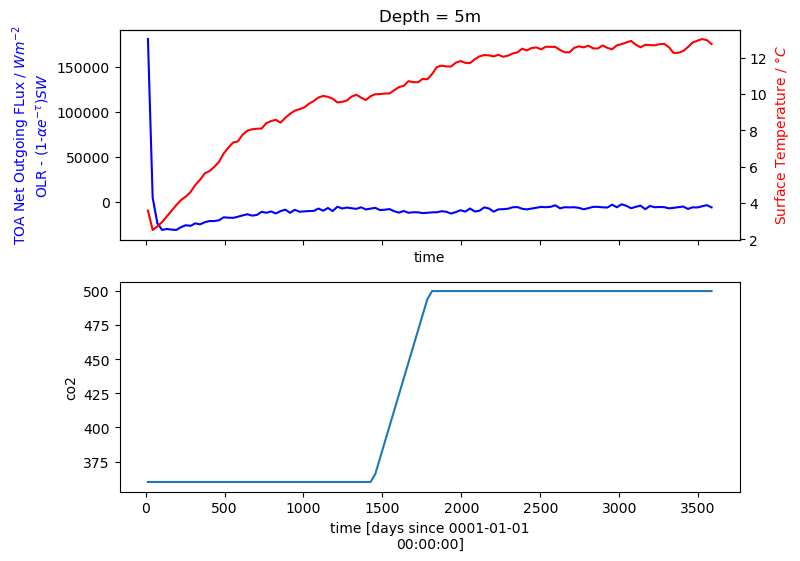

In [6]:
# Plot spinup time for each depth value
fig, ax = plt.subplots(2,1, figsize=(8, 6), sharex=True)
plot_spinup(dataset, ax[0], albedo, tau)
ax[0].set_title(f"Depth = {depth_value}m")

# Indicate time when CO2 concentration starts to increase
dataset.co2.sum(dim = ['scalar_axis']).plot.line(ax=ax[1]);


In the `byrne` spin_up datasets, the max temperature reached is just above $ 10\degree C $ so clearly the increased $CO_2$ after 5 years has made a difference even if it is not that obvious.

You can start to see the temperature flatten towards $ 10\degree C $ just before 1500 days.